In [68]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

In [69]:
day = 1
df = pd.read_csv(f"./observations_round_4_day_{day}.csv", sep=",", header=0)

In [70]:
df

,timestamp,MAGNIFICENT_MACARONS,TRANSPORT_FEES,EXPORT_TARIFFS,IMPORT_TARIFF,SUGAR_PRICE,SUNLIGHT_INDEX
0,0,627.75,1.0,9.0,-3.0,200.000000,60.00
1,100,630.75,1.0,9.0,-3.0,200.098445,60.00
2,200,630.75,1.0,9.0,-3.0,200.103915,60.00
3,300,632.75,1.0,9.0,-3.0,200.352462,60.01
4,400,631.25,1.0,9.0,-3.0,200.201545,60.01
...,...,...,...,...,...,...,...
9995,999500,661.75,1.4,10.5,-4.0,209.926279,64.94
9996,999600,660.25,1.4,10.5,-4.0,209.565005,64.96
9997,999700,659.25,1.4,10.5,-4.0,209.504858,64.98
9998,999800,658.75,1.4,10.5,-4.0,209.482890,65.00


In [ ]:
# # Step 1: List of products you're interested in
# products_of_interest = [
#     'MAGNIFICENT_MACARONS',
#     'TRANSPORT_FEES',
#     'EXPORT_TARIFFS',
#     'IMPORT_TARIFF',
#     'SUNLIGHT_INDEX',
#     'SUGAR_PRICE'
# ]

# # Step 2: Filter the DataFrame to include only those products
# df_filtered = df[df['product'].isin(products_of_interest)]

# # Step 3: Select only the columns you care about
# columns_to_keep = ['timestamp', 'product', 'mid_price', 'profit_and_loss']
# df_filtered = df_filtered[columns_to_keep]

# # Optional: Show the result
# print(df_filtered.head())



In [ ]:
# # Load your CSV (with correct header row)
# df = pd.read_csv("observations_round_4_day_1.csv")

# # Rename all columns to lowercase (optional but cleaner)
# df.columns = df.columns.str.strip().str.lower()

# # Filter just the MACARONS rows
# df_macarons = df[df['product'] == 'MAGNIFICENT_MACARONS']

# # Select relevant columns (fixing the names!)
# columns_to_keep = ['timestamp', 'transport_fees', 'EXPORT_TARIFFSs', 'import_tariff', 'sunlight_index', 'sugar_price']
# df_macarons_filtered = df_macarons[columns_to_keep]

# # Optional: preview it
# print(df_macarons_filtered.head())

df

,timestamp,MAGNIFICENT_MACARONS,TRANSPORT_FEES,EXPORT_TARIFFS,IMPORT_TARIFF,SUGAR_PRICE,SUNLIGHT_INDEX
0,0,627.75,1.0,9.0,-3.0,200.000000,60.00
1,100,630.75,1.0,9.0,-3.0,200.098445,60.00
2,200,630.75,1.0,9.0,-3.0,200.103915,60.00
3,300,632.75,1.0,9.0,-3.0,200.352462,60.01
4,400,631.25,1.0,9.0,-3.0,200.201545,60.01
...,...,...,...,...,...,...,...
9995,999500,661.75,1.4,10.5,-4.0,209.926279,64.94
9996,999600,660.25,1.4,10.5,-4.0,209.565005,64.96
9997,999700,659.25,1.4,10.5,-4.0,209.504858,64.98
9998,999800,658.75,1.4,10.5,-4.0,209.482890,65.00


In [ ]:
df = df[['timestamp','MAGNIFICENT_MACARONS','TRANSPORT_FEES','EXPORT_TARIFFSS','IMPORT_TARIFF','SUGAR_PRICE','SUNLIGHT_INDEX']]

In [74]:
df

,timestamp,MAGNIFICENT_MACARONS,TRANSPORT_FEES,EXPORT_TARIFFS,IMPORT_TARIFF,SUGAR_PRICE,SUNLIGHT_INDEX
0,0,627.75,1.0,9.0,-3.0,200.000000,60.00
1,100,630.75,1.0,9.0,-3.0,200.098445,60.00
2,200,630.75,1.0,9.0,-3.0,200.103915,60.00
3,300,632.75,1.0,9.0,-3.0,200.352462,60.01
4,400,631.25,1.0,9.0,-3.0,200.201545,60.01
...,...,...,...,...,...,...,...
9995,999500,661.75,1.4,10.5,-4.0,209.926279,64.94
9996,999600,660.25,1.4,10.5,-4.0,209.565005,64.96
9997,999700,659.25,1.4,10.5,-4.0,209.504858,64.98
9998,999800,658.75,1.4,10.5,-4.0,209.482890,65.00


In [75]:
df.loc[:, 'MAGNIFICENT_MACARONS'] = df['MAGNIFICENT_MACARONS'].ewm(alpha = 0.05).mean().reset_index(drop=True)

In [77]:
df['SUGAR_PRICE_DIFF'] = np.abs(df["SUGAR_PRICE"] - 70)

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with separate y-axes for each feature
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces for each feature
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['MAGNIFICENT_MACARONS'], name='MAGNIFICENT_MACARONS'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['TRANSPORT_FEES'], name='TRANSPORT_FEES'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['EXPORT_TARIFFS'], name='EXPORT_TARIFFS'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['IMPORT_TARIFF'], name='IMPORT_TARIFF'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['SUNLIGHT_INDEX'], name='SUNLIGHT_INDEX'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['SUGAR_PRICE'], name='SUGAR_PRICE'), secondary_y=True)
fig.add_trace(go.Scatter(x=df['timestamp'], y=df['SUGAR_PRICE_DIFF'], name='SUGAR_PRICE_DIFF'), secondary_y=True)

# Set the layout and axis properties
fig.update_layout(
    title='Feature Values over Time',
    xaxis_title='Timestamp',
    yaxis_title='MAGNIFICENT_MACARONS',
    legend=dict(x=0, y=1.15, orientation='h')
)

# Update y-axis titles
fig.update_yaxes(title_text="MAGNIFICENT_MACARONS", secondary_y=False)
fig.update_yaxes(title_text="Other Features", secondary_y=True)

# Show the plot
fig.show()

#127.6, 171.1

negative corr with transport fees 
mayyyyybe positive corr with export tariff?? looks shit tho 
honestly tarrifs possibly uncorr.
possibly uncorr with sunlight...if our calc is right sunlight is just nominal per day 


transportation fees perhaps lag orchids going up–could be since ducks probably set price and they know when transportation fees are going up??? but price sticky on the way down?? 




In [81]:
def get_prev_returns(df, col, its):
    prev_col = f"{col}_prev_{its}_its"
    df[prev_col] = df[col].shift(its)
    
    if col == 'SUGAR_PRICE_DIFF':
        df[f"{col}_returns_from_{its}_its_ago"] = ((df[col] - df[prev_col]) / df[prev_col]).where(df['SUGAR_PRICE_DIFF'] >= 10, 0)
    else:
        df[f"{col}_returns_from_{its}_its_ago"] = (df[col] - df[prev_col]) / df[prev_col]
    
    df.drop(columns=[prev_col], inplace=True)
    return df

def get_future_returns(df, col, its):
    future_col = f"{col}_future_{its}_its"
    df[future_col] = df[col].shift(-its)
    
    if col == 'SUGAR_PRICE_DIFF':
        df[f"{col}_returns_in_{its}_its"] = ((df[future_col] - df[col]) / df[col]).where(df['SUGAR_PRICE_DIFF'] >= 7.5, 0)
    else:
        df[f"{col}_returns_in_{its}_its"] = (df[future_col] - df[col]) / df[col]
    
    df.drop(columns=[future_col], inplace=True)
    return df

Iteration: 1
Correlation between TRANSPORT_FEES_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: -0.01484281686267419
Correlation between EXPORT_TARIFFS_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.001963920523934628
Correlation between IMPORT_TARIFF_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.0031841038537176497
Correlation between SUNLIGHT_INDEX_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: -0.12482586514808741
Correlation between SUGAR_PRICE_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.1761182728794495
Correlation between SUGAR_PRICE_DIFF_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.1761827310125974


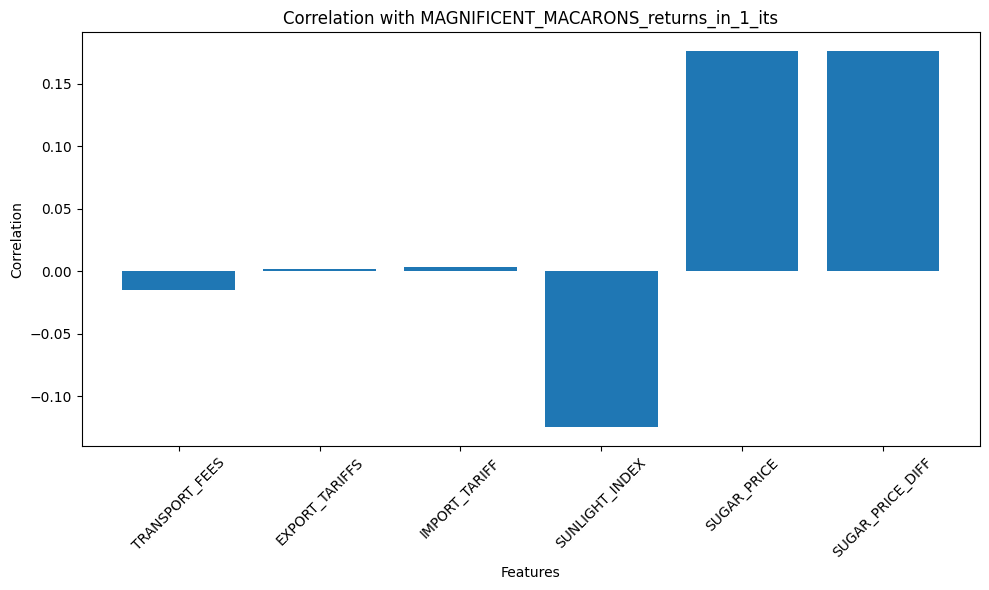

Iteration: 5
Correlation between TRANSPORT_FEES_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: -0.018075801865019902
Correlation between EXPORT_TARIFFS_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.023684767148670585
Correlation between IMPORT_TARIFF_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.020703266343027715
Correlation between SUNLIGHT_INDEX_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: -0.13606667277474035
Correlation between SUGAR_PRICE_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.3247387204803881
Correlation between SUGAR_PRICE_DIFF_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.3248636050479449


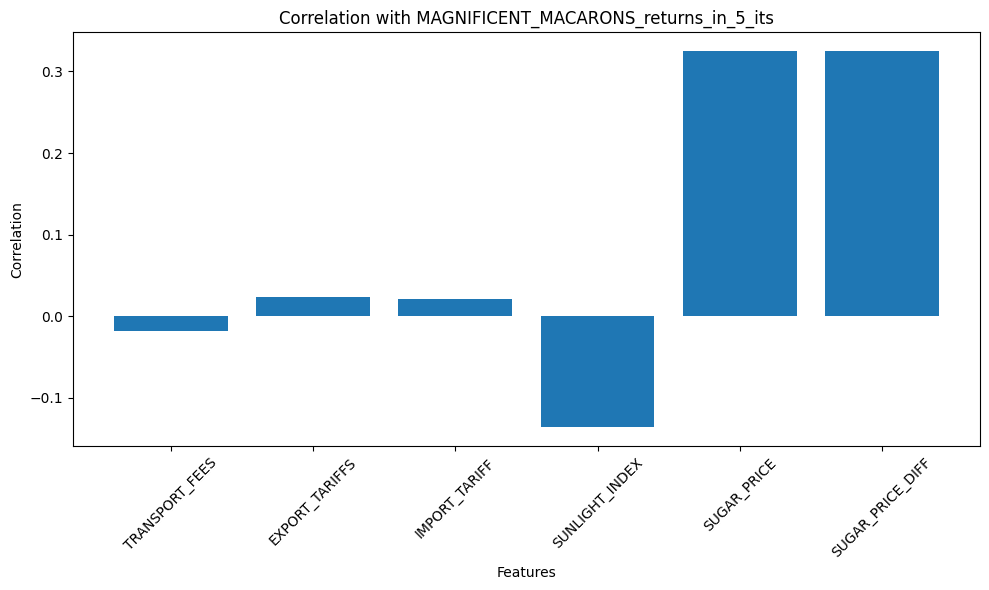

Iteration: 10
Correlation between TRANSPORT_FEES_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: -0.0178808406074032
Correlation between EXPORT_TARIFFS_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.02219161893406562
Correlation between IMPORT_TARIFF_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.019494479373856385
Correlation between SUNLIGHT_INDEX_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: -0.14525575144036737
Correlation between SUGAR_PRICE_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.37343039117355187
Correlation between SUGAR_PRICE_DIFF_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.37355062194537925


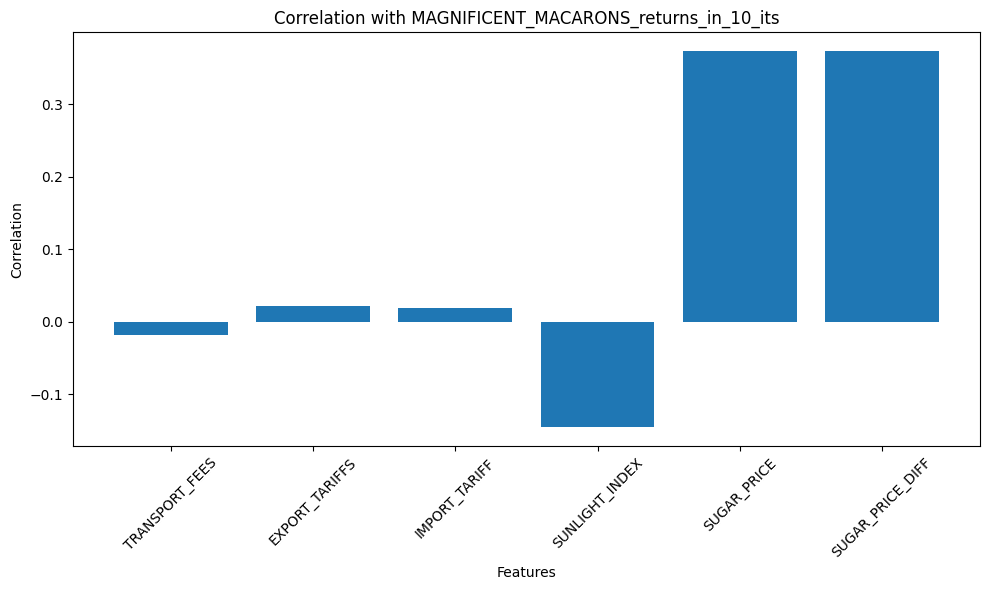

Iteration: 50
Correlation between TRANSPORT_FEES_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.03690343356346149
Correlation between EXPORT_TARIFFS_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: -0.005999608970161972
Correlation between IMPORT_TARIFF_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.08730635563356733
Correlation between SUNLIGHT_INDEX_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: -0.20698802048566434
Correlation between SUGAR_PRICE_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.21561683991827132
Correlation between SUGAR_PRICE_DIFF_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.21456888272461996


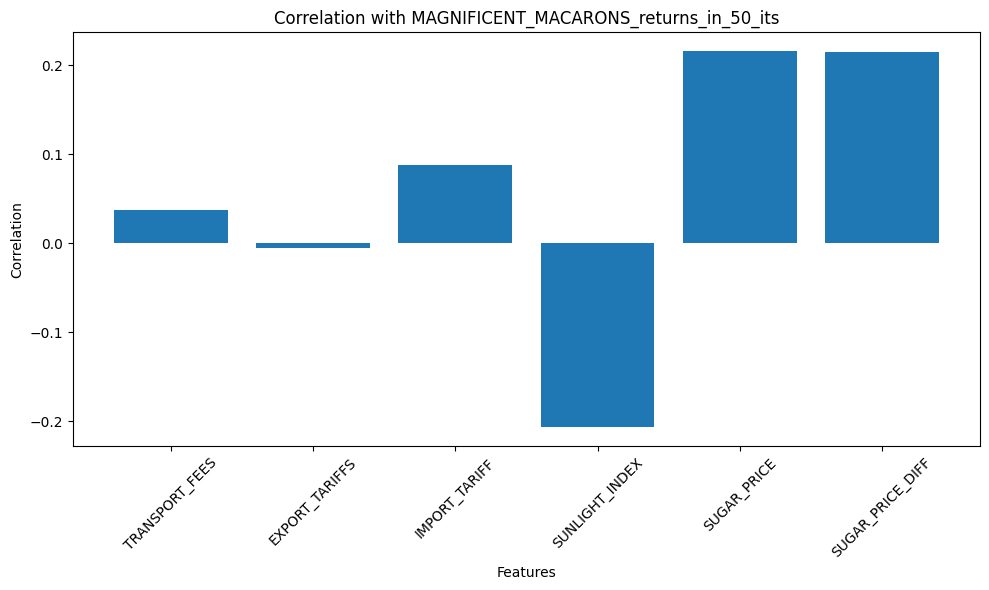

Iteration: 100
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.07850037656803804
Correlation between EXPORT_TARIFFS_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: -0.020350445263411347
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.016698924448882005
Correlation between SUNLIGHT_INDEX_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: -0.2688825765767314
Correlation between SUGAR_PRICE_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.20021648576748027
Correlation between SUGAR_PRICE_DIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.19864115594369583


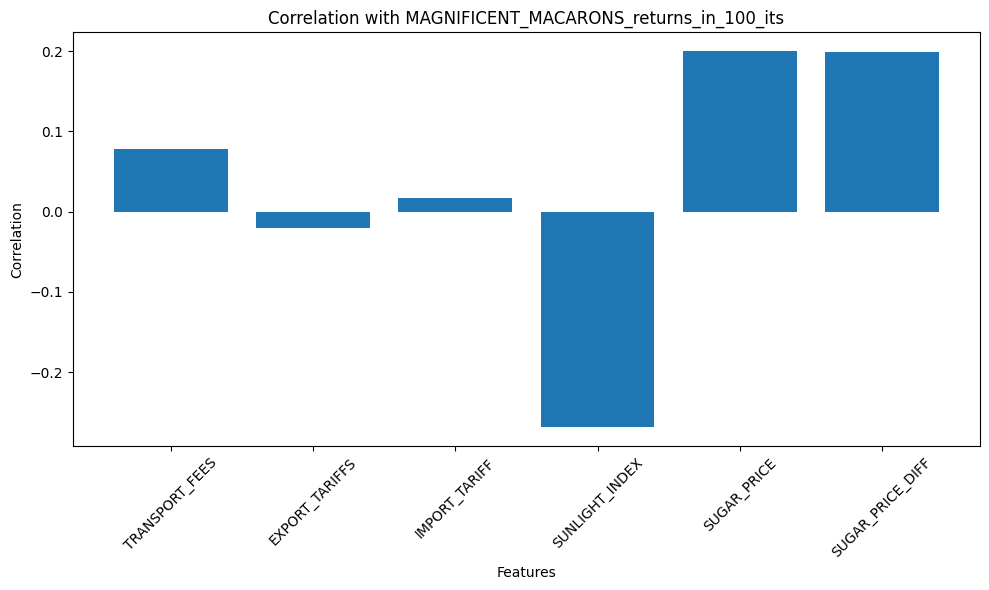

Iteration: 250
Correlation between TRANSPORT_FEES_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: -0.13993437572779516
Correlation between EXPORT_TARIFFS_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: -0.34870787232709993
Correlation between IMPORT_TARIFF_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: 0.14462547730661854
Correlation between SUNLIGHT_INDEX_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: -0.3598665279443225
Correlation between SUGAR_PRICE_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: 0.13425059851111845
Correlation between SUGAR_PRICE_DIFF_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: 0.1344495787573464


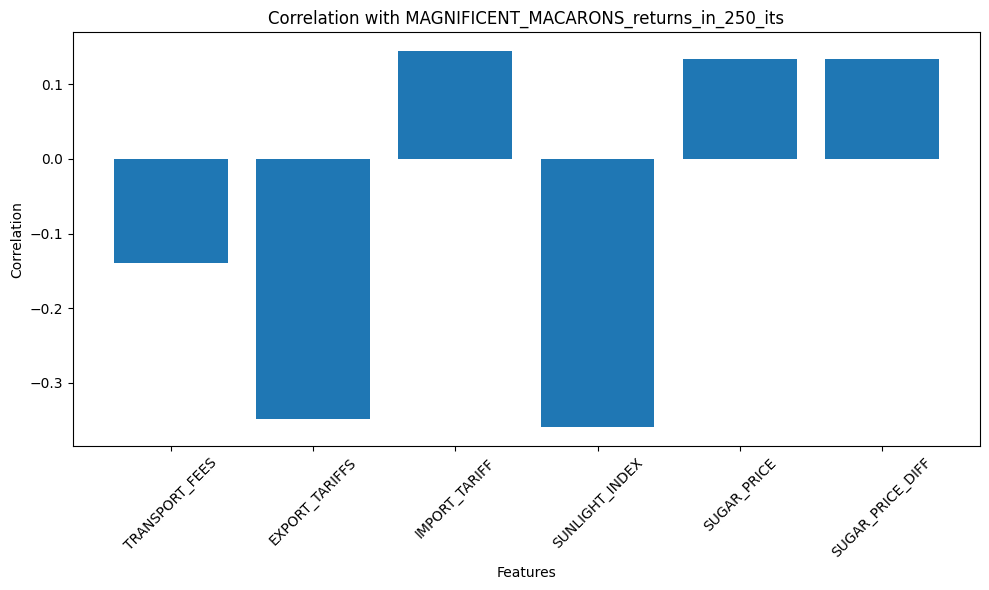

Iteration: 500
Correlation between TRANSPORT_FEES_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.11539399394086586
Correlation between EXPORT_TARIFFS_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.10291003916239726
Correlation between IMPORT_TARIFF_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.12064504831351988
Correlation between SUNLIGHT_INDEX_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.11906801703280376
Correlation between SUGAR_PRICE_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.03779179010781358
Correlation between SUGAR_PRICE_DIFF_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.03386082151721347


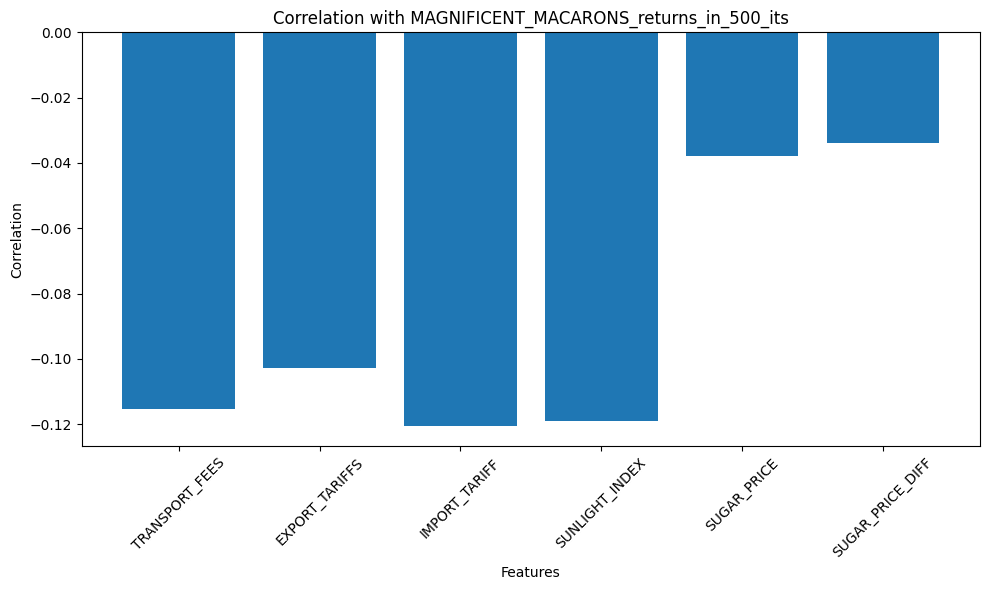

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        if col == 'MAGNIFICENT_MACARONS':
            new_df = get_future_returns(new_df, col, iteration)

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [1, 5, 10, 50, 100, 250, 500]

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and MAGNIFICENT_MACARONS_returns_in_{iteration}_its: {corr}")

    # Create a bar graph of the correlations
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.keys(), correlations.values())
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.title(f"Correlation with MAGNIFICENT_MACARONS_returns_in_{iteration}_its")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Iteration: 1
Correlation between TRANSPORT_FEES_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: -0.01484281686267419
Correlation between EXPORT_TARIFFS_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.001963920523934628
Correlation between IMPORT_TARIFF_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.0031841038537176497
Correlation between SUNLIGHT_INDEX_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: -0.12482586514808741
Correlation between SUGAR_PRICE_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.1761182728794495
Correlation between SUGAR_PRICE_DIFF_returns_from_1_its_ago and MAGNIFICENT_MACARONS_returns_in_1_its: 0.1761827310125974


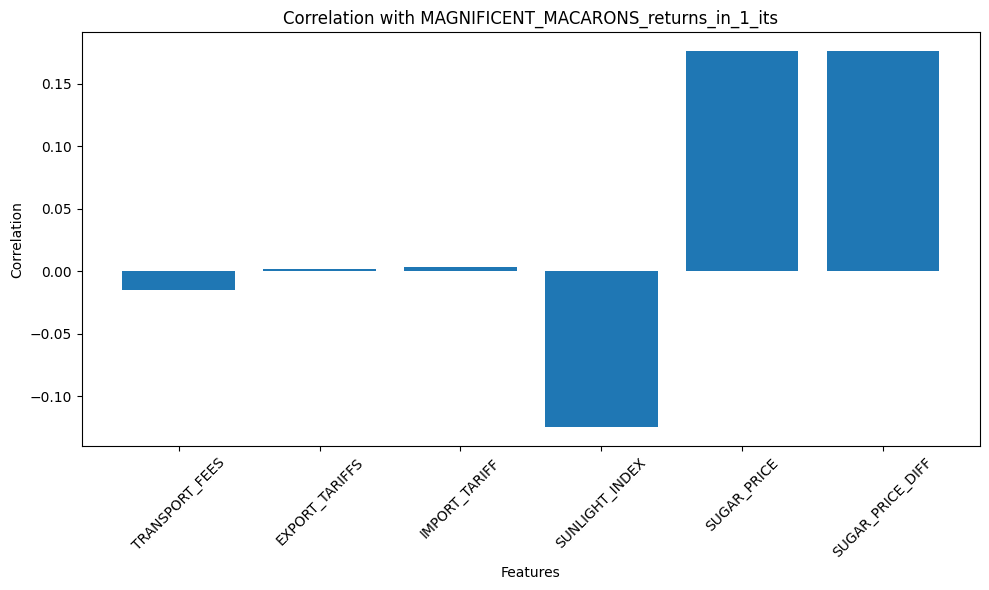

Iteration: 5
Correlation between TRANSPORT_FEES_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: -0.018075801865019902
Correlation between EXPORT_TARIFFS_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.023684767148670585
Correlation between IMPORT_TARIFF_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.020703266343027715
Correlation between SUNLIGHT_INDEX_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: -0.13606667277474035
Correlation between SUGAR_PRICE_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.3247387204803881
Correlation between SUGAR_PRICE_DIFF_returns_from_5_its_ago and MAGNIFICENT_MACARONS_returns_in_5_its: 0.3248636050479449


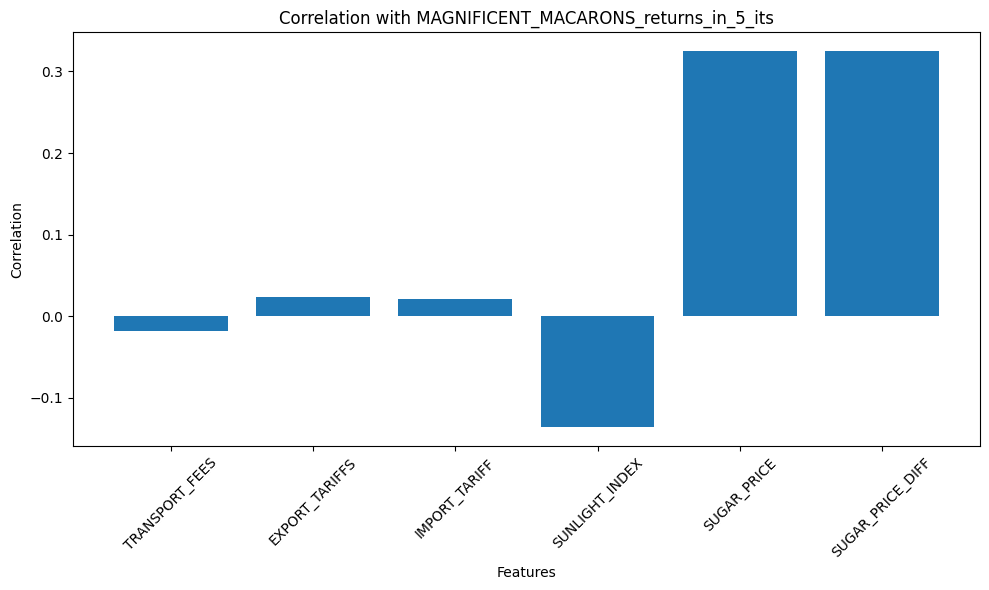

Iteration: 10
Correlation between TRANSPORT_FEES_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: -0.0178808406074032
Correlation between EXPORT_TARIFFS_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.02219161893406562
Correlation between IMPORT_TARIFF_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.019494479373856385
Correlation between SUNLIGHT_INDEX_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: -0.14525575144036737
Correlation between SUGAR_PRICE_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.37343039117355187
Correlation between SUGAR_PRICE_DIFF_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.37355062194537925


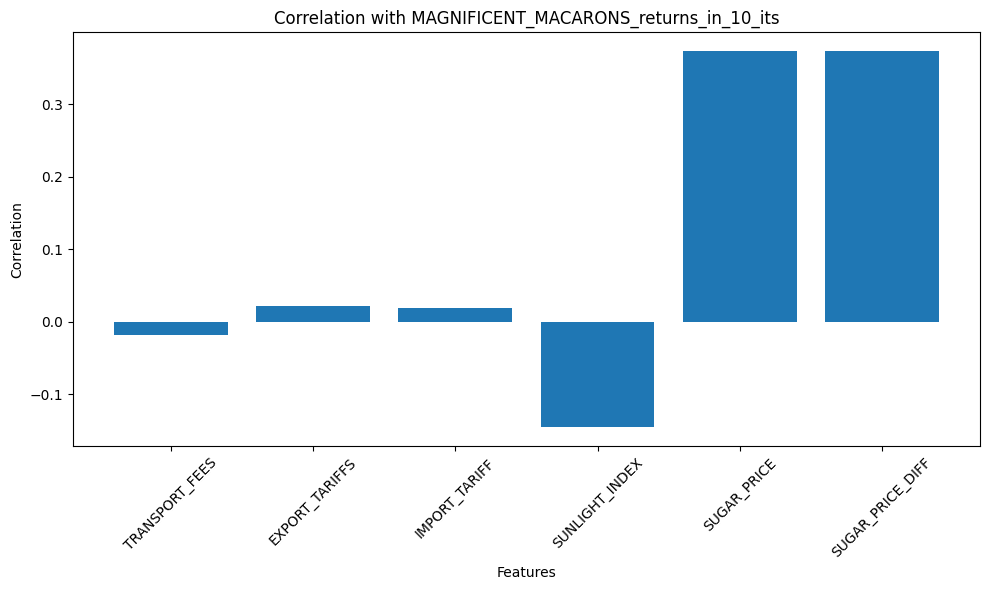

Iteration: 50
Correlation between TRANSPORT_FEES_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.03690343356346149
Correlation between EXPORT_TARIFFS_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: -0.005999608970161972
Correlation between IMPORT_TARIFF_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.08730635563356733
Correlation between SUNLIGHT_INDEX_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: -0.20698802048566434
Correlation between SUGAR_PRICE_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.21561683991827132
Correlation between SUGAR_PRICE_DIFF_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.21456888272461996


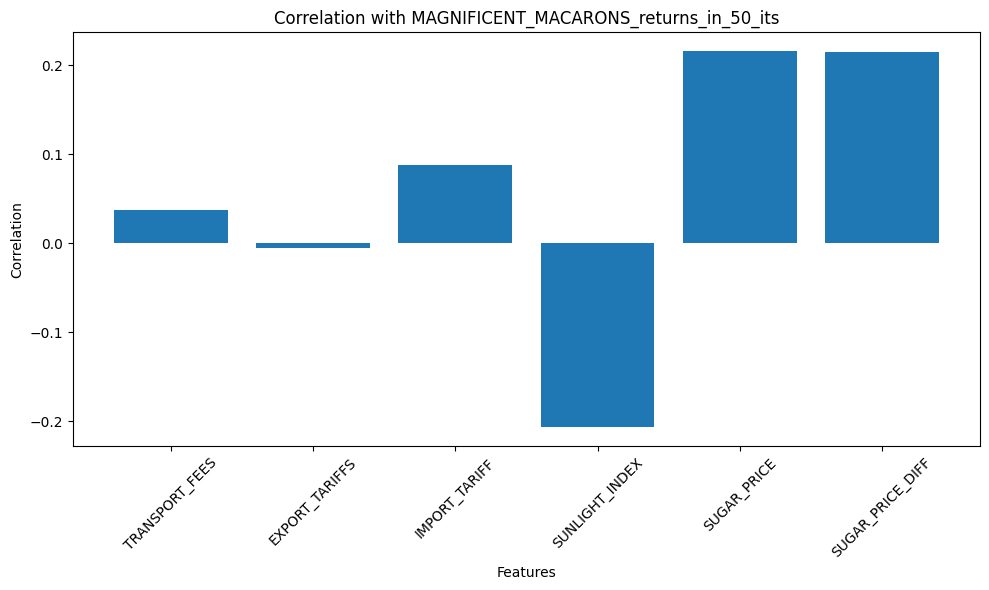

Iteration: 100
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.07850037656803804
Correlation between EXPORT_TARIFFS_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: -0.020350445263411347
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.016698924448882005
Correlation between SUNLIGHT_INDEX_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: -0.2688825765767314
Correlation between SUGAR_PRICE_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.20021648576748027
Correlation between SUGAR_PRICE_DIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.19864115594369583


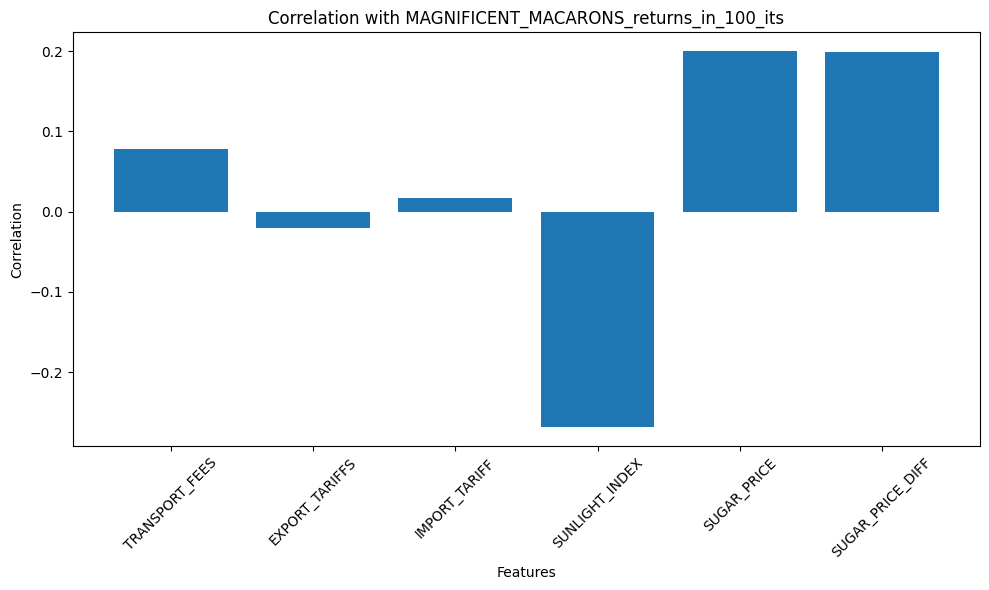

Iteration: 250
Correlation between TRANSPORT_FEES_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: -0.13993437572779516
Correlation between EXPORT_TARIFFS_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: -0.34870787232709993
Correlation between IMPORT_TARIFF_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: 0.14462547730661854
Correlation between SUNLIGHT_INDEX_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: -0.3598665279443225
Correlation between SUGAR_PRICE_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: 0.13425059851111845
Correlation between SUGAR_PRICE_DIFF_returns_from_250_its_ago and MAGNIFICENT_MACARONS_returns_in_250_its: 0.1344495787573464


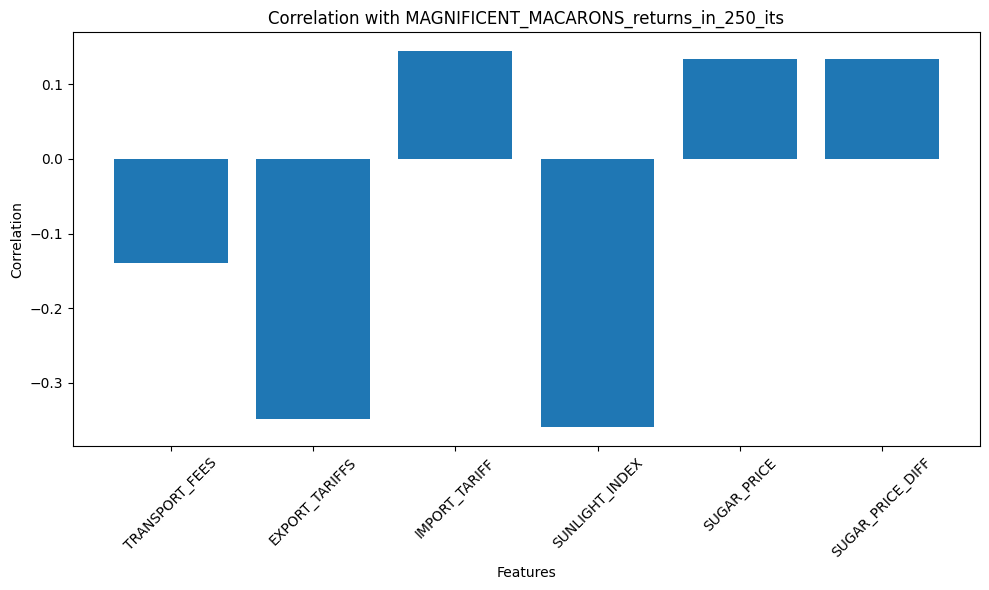

Iteration: 500
Correlation between TRANSPORT_FEES_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.11539399394086586
Correlation between EXPORT_TARIFFS_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.10291003916239726
Correlation between IMPORT_TARIFF_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.12064504831351988
Correlation between SUNLIGHT_INDEX_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.11906801703280376
Correlation between SUGAR_PRICE_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.03779179010781358
Correlation between SUGAR_PRICE_DIFF_returns_from_500_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.03386082151721347


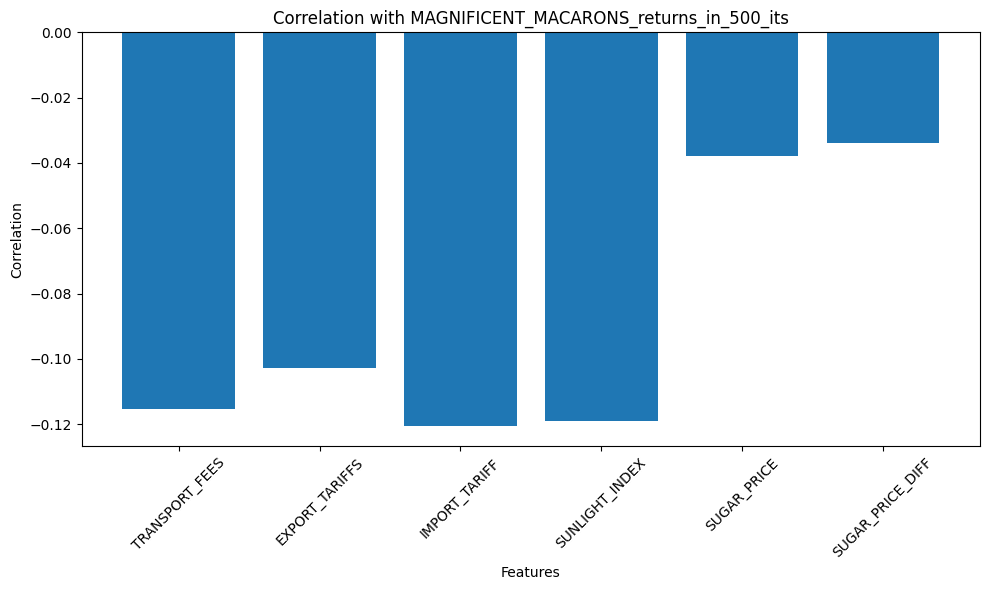

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        if col == 'MAGNIFICENT_MACARONS':
            new_df = get_future_returns(new_df, col, iteration)

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [1, 5, 10, 50, 100, 250, 500]

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and MAGNIFICENT_MACARONS_returns_in_{iteration}_its: {corr}")

    # Create a bar graph of the correlations
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.keys(), correlations.values())
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.title(f"Correlation with MAGNIFICENT_MACARONS_returns_in_{iteration}_its")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Iteration: 100
Correlation between MAGNIFICENT_MACARONS_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.12311873809955033
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.07850037656803804
Correlation between EXPORT_TARIFFS_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: -0.020350445263411347
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.016698924448882005
Correlation between SUNLIGHT_INDEX_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: -0.2688825765767314
Correlation between SUGAR_PRICE_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.20021648576748027
Correlation between SUGAR_PRICE_DIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.19864115594369583
Iteration: 150
Correlation between MAGNIFICENT_MACARONS_returns_from_150_its_ago and MAGNIFICENT_MACARO

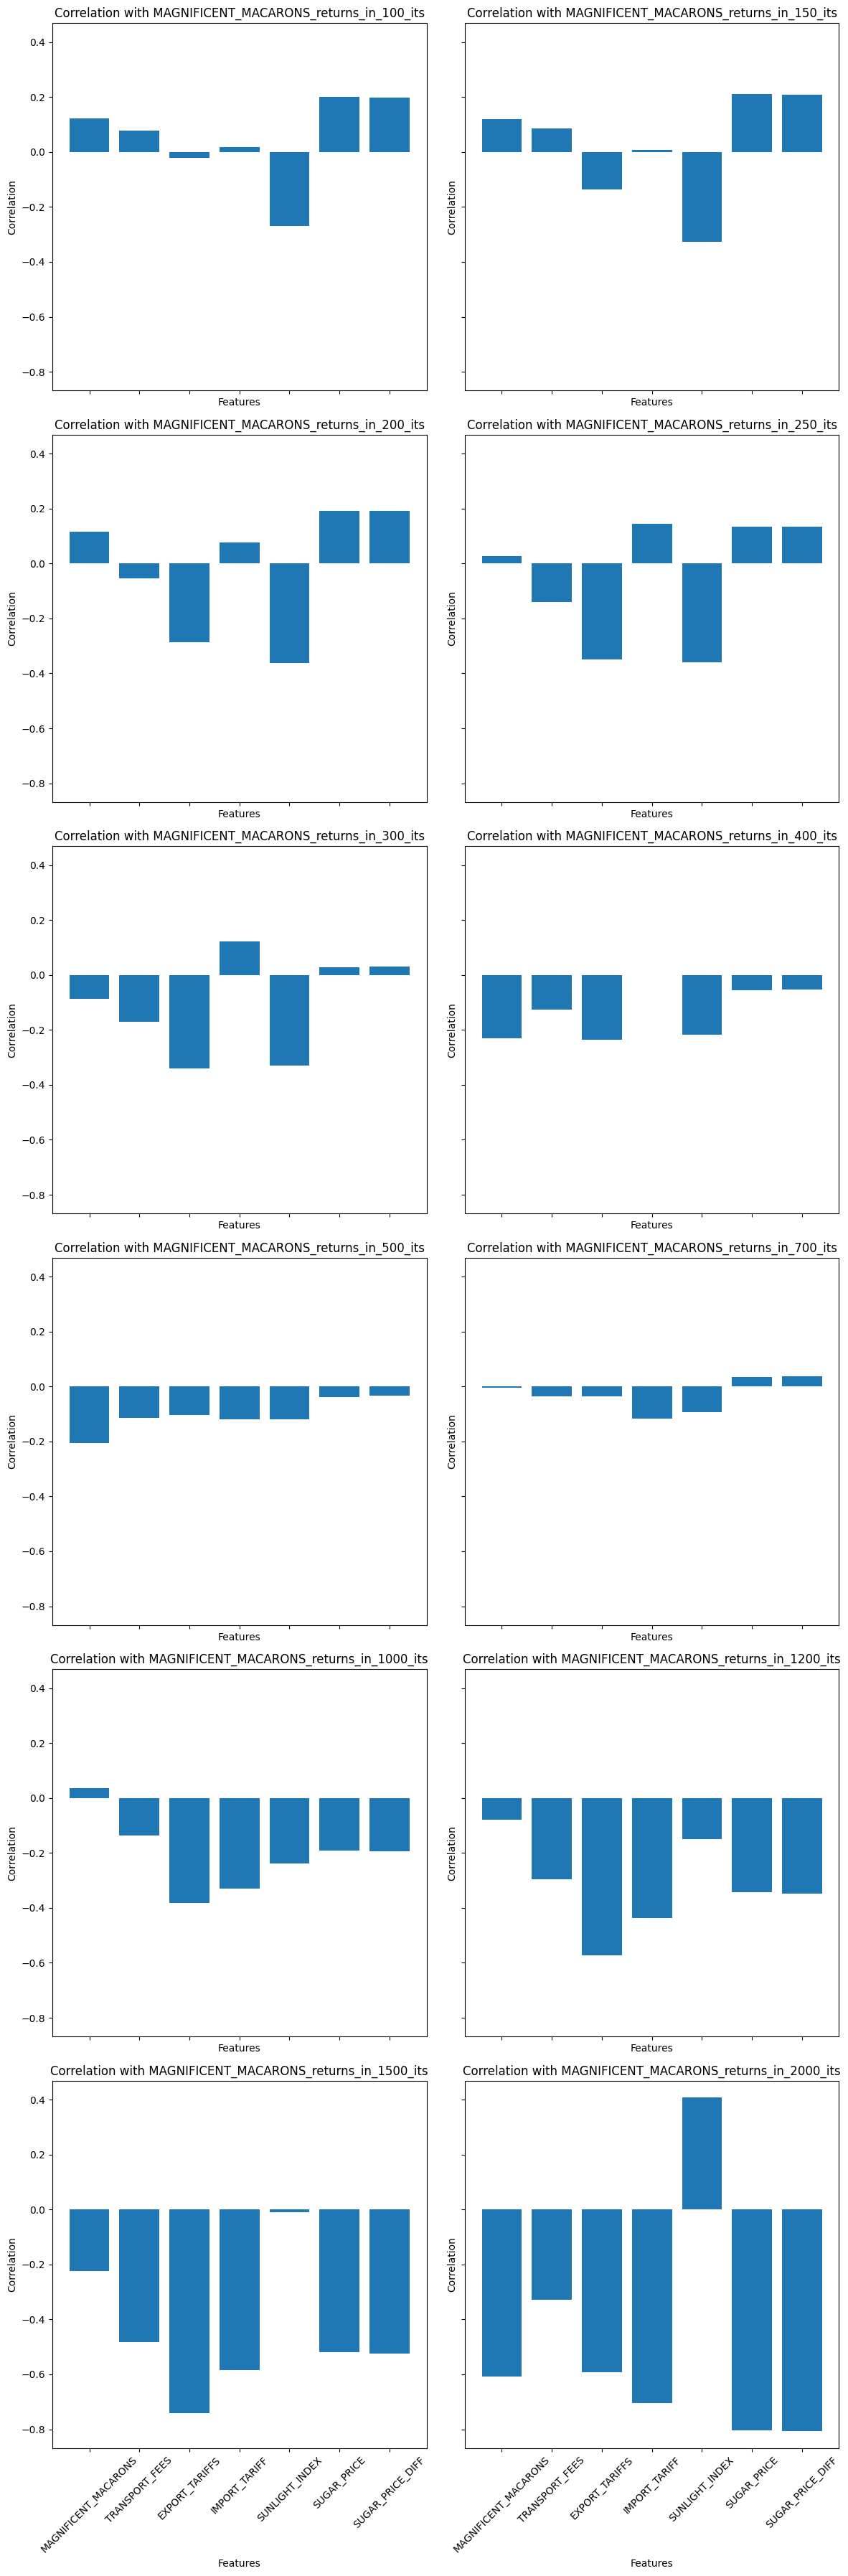

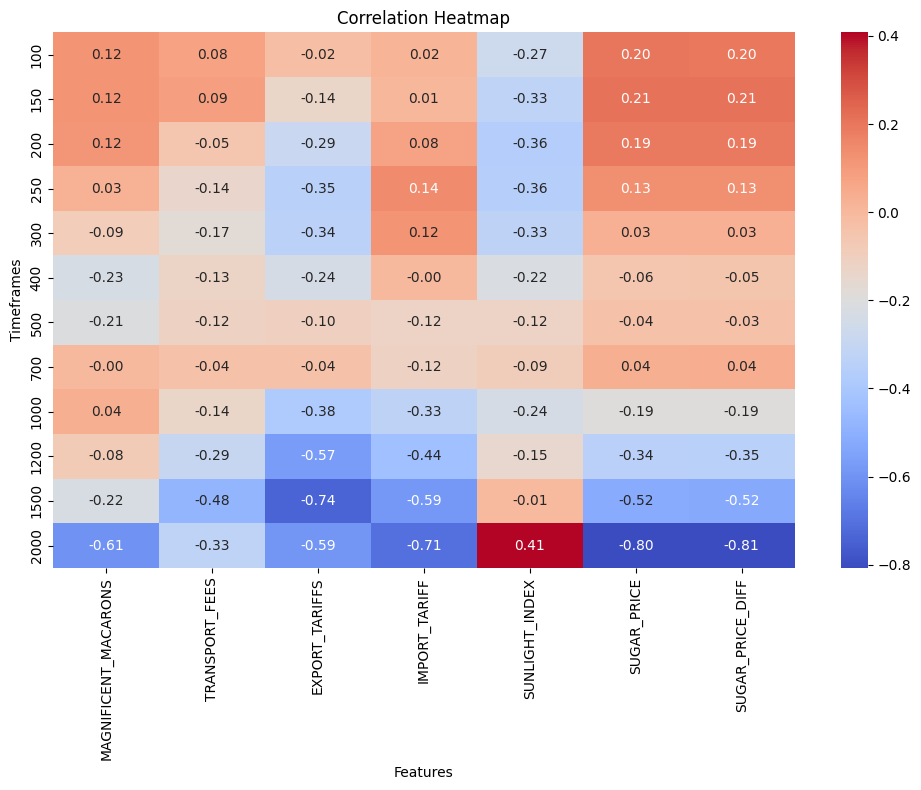

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [100, 150, 200, 250, 300, 400, 500, 700, 1000, 1200, 1500, 2000]
correlation_data = {}

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)
    correlation_data[iteration] = correlations

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and MAGNIFICENT_MACARONS_returns_in_{iteration}_its: {corr}")

# Create a grid of bar charts
num_iterations = len(iteration_candidates)
num_cols = 2
num_rows = (num_iterations + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, iteration in enumerate(iteration_candidates):
    ax = axes[i]
    correlations = correlation_data[iteration]
    ax.bar(correlations.keys(), correlations.values())
    ax.set_xlabel('Features')
    ax.set_ylabel('Correlation')
    ax.set_title(f"Correlation with MAGNIFICENT_MACARONS_returns_in_{iteration}_its")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap
heatmap_data = pd.DataFrame(correlation_data).T
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Features')
plt.ylabel('Timeframes')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Iteration: 100
Correlation between MAGNIFICENT_MACARONS_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.060132410090083376
Correlation between TRANSPORT_FEES_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.03172729391301151
Correlation between EXPORT_TARIFFS_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.16421271125464093
Correlation between IMPORT_TARIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: 0.027949453689074453
Correlation between SUNLIGHT_INDEX_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: -0.3670076723294037
Correlation between SUGAR_PRICE_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: 0.058826338709591676
Correlation between SUGAR_PRICE_DIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: 0.059840165825579814
Iteration: 150
Correlation between MAGNIFICENT_MACARONS_returns_from_150_its_ago and MAGNIFICENT_MA

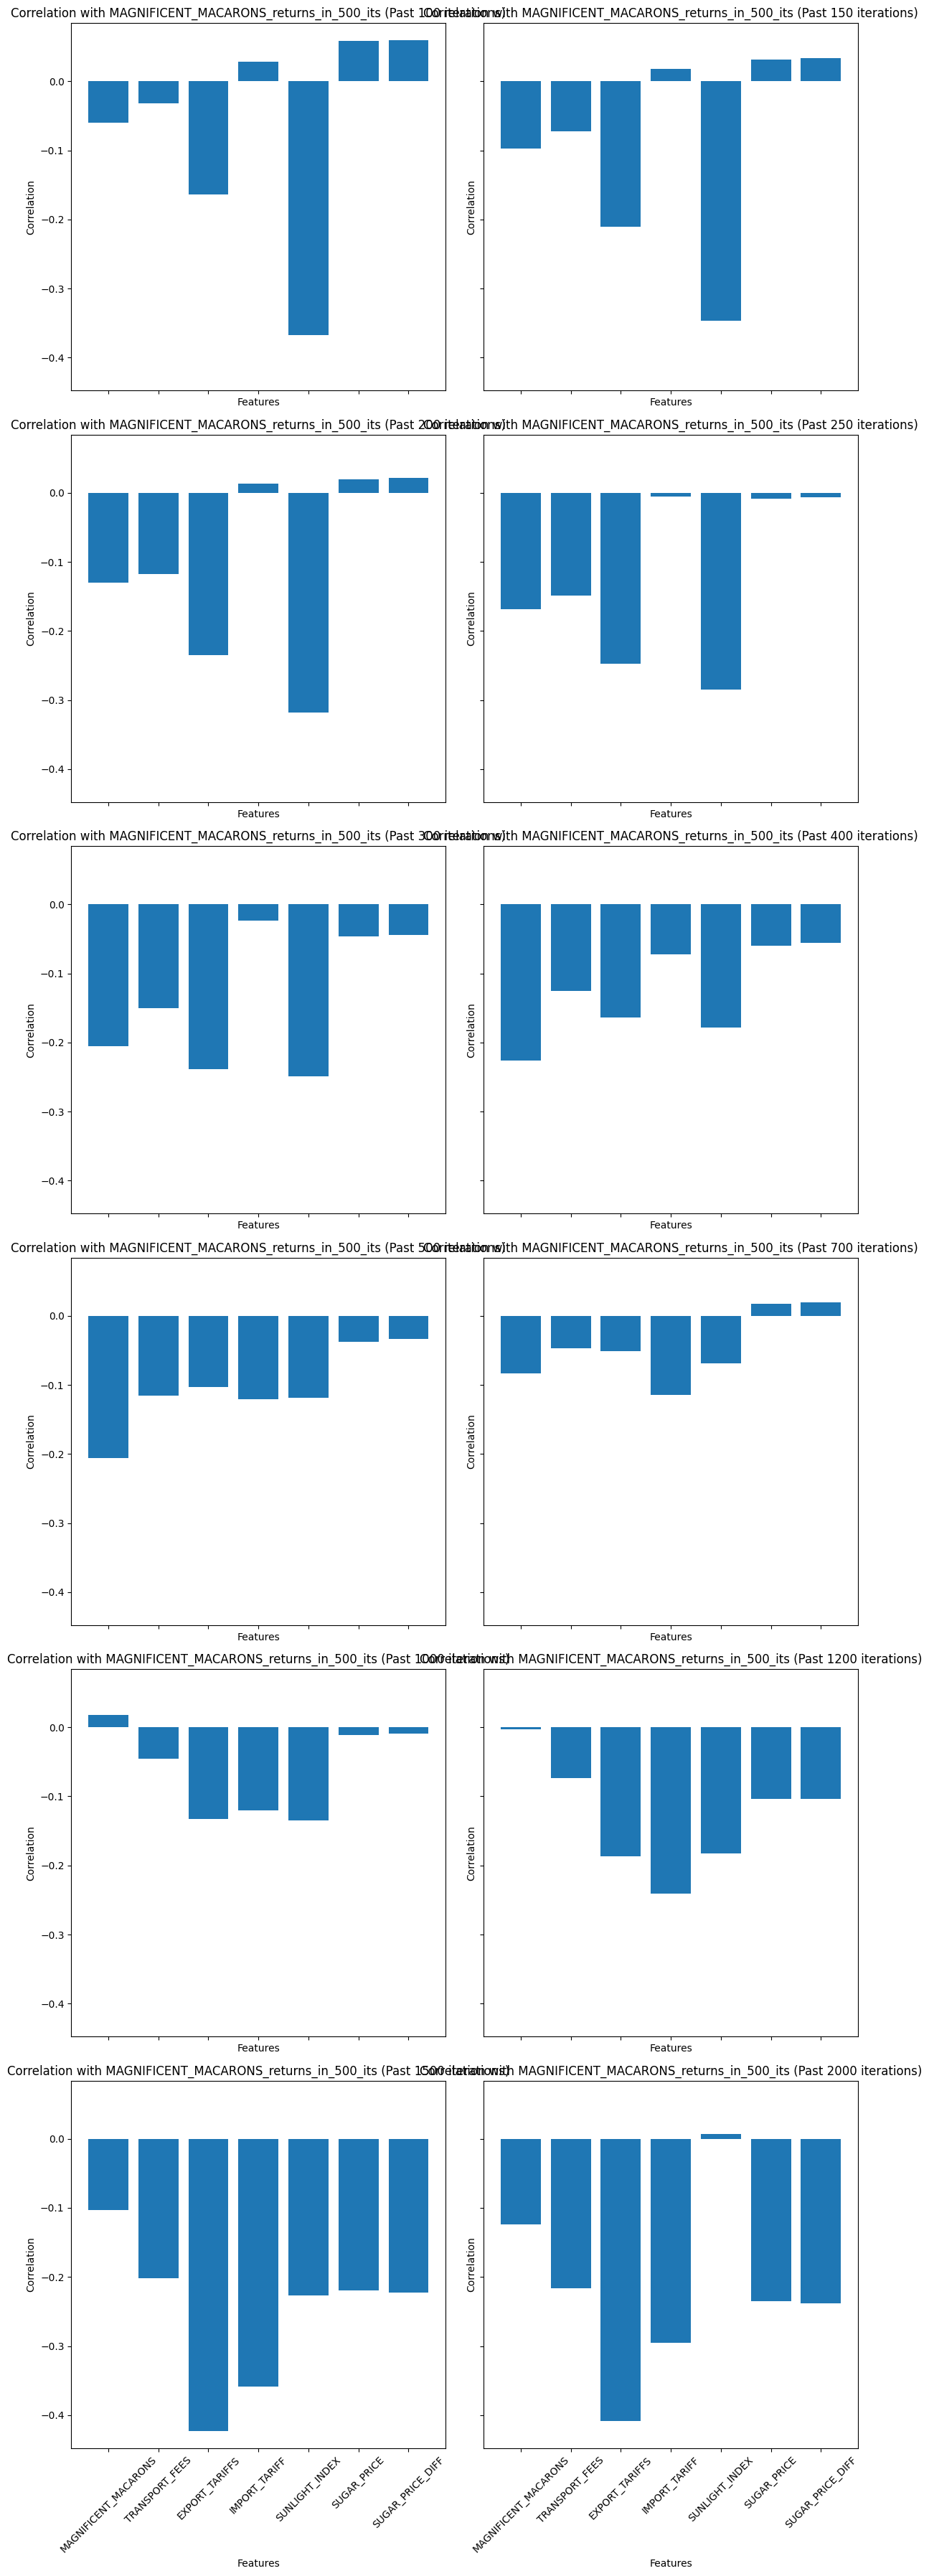

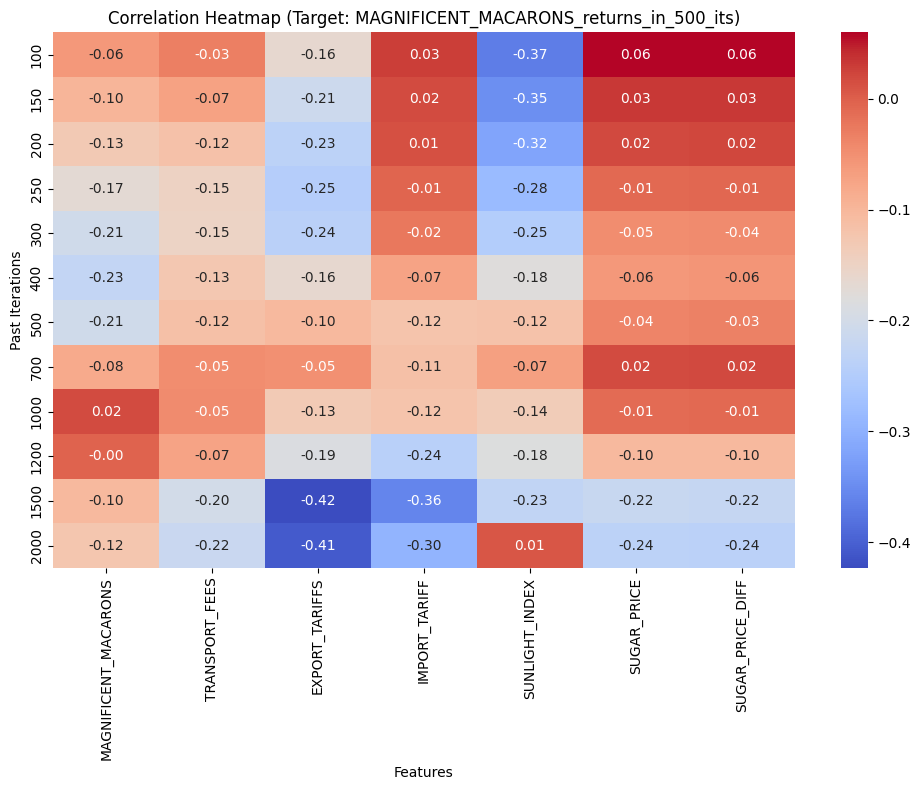

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        if col == 'MAGNIFICENT_MACARONS':
            new_df = get_future_returns(new_df, col, 500)  # Standardize to 500 iterations for ORCHIDS' future returns

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF', 'SUNLIGHT_INDEX', 'SUGAR_PRICE', 'SUGAR_PRICE_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df["MAGNIFICENT_MACARONS_returns_in_500_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [100, 150, 200, 250, 300, 400, 500, 700, 1000, 1200, 1500, 2000]
correlation_data = {}

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    correlations = calculate_correlation(new_df, iteration)
    correlation_data[iteration] = correlations

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and MAGNIFICENT_MACARONS_returns_in_500_its: {corr}")

# Create a grid of bar charts
num_iterations = len(iteration_candidates)
num_cols = 2
num_rows = (num_iterations + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, iteration in enumerate(iteration_candidates):
    ax = axes[i]
    correlations = correlation_data[iteration]
    ax.bar(correlations.keys(), correlations.values())
    ax.set_xlabel('Features')
    ax.set_ylabel('Correlation')
    ax.set_title(f"Correlation with MAGNIFICENT_MACARONS_returns_in_500_its (Past {iteration} iterations)")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap
heatmap_data = pd.DataFrame(correlation_data).T
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel('Features')
plt.ylabel('Past Iterations')
plt.title("Correlation Heatmap (Target: MAGNIFICENT_MACARONS_returns_in_500_its)")
plt.tight_layout()
plt.show()

linear regression: 

target: orchids returns in 500 its

features:
- orchids_returns in last 700 its
- export tariff last 500 its 
- humidity_diff last 700 its 
- 

In [87]:
df_humidity_over_10 = df[df['SUGAR_PRICE_DIFF'] >= 10]

In [88]:
df_humidity_over_10

,timestamp,MAGNIFICENT_MACARONS,TRANSPORT_FEES,EXPORT_TARIFFS,IMPORT_TARIFF,SUGAR_PRICE,SUNLIGHT_INDEX,SUGAR_PRICE_DIFF
0,0,627.750000,1.0,9.0,-3.0,200.000000,60.00,130.000000
1,100,629.288462,1.0,9.0,-3.0,200.098445,60.00,130.098445
2,200,629.800833,1.0,9.0,-3.0,200.103915,60.00,130.103915
3,300,630.595783,1.0,9.0,-3.0,200.352462,60.01,130.352462
4,400,630.740381,1.0,9.0,-3.0,200.201545,60.01,130.201545
...,...,...,...,...,...,...,...,...
9995,999500,670.508314,1.4,10.5,-4.0,209.926279,64.94,139.926279
9996,999600,669.995398,1.4,10.5,-4.0,209.565005,64.96,139.565005
9997,999700,669.458128,1.4,10.5,-4.0,209.504858,64.98,139.504858
9998,999800,668.922722,1.4,10.5,-4.0,209.482890,65.00,139.482890


Iteration: 10
Correlation between SUGAR_PRICE_DIFF_returns_from_10_its_ago and MAGNIFICENT_MACARONS_returns_in_10_its: 0.37355062194537925
Iteration: 50
Correlation between SUGAR_PRICE_DIFF_returns_from_50_its_ago and MAGNIFICENT_MACARONS_returns_in_50_its: 0.21456888272461996
Iteration: 75
Correlation between SUGAR_PRICE_DIFF_returns_from_75_its_ago and MAGNIFICENT_MACARONS_returns_in_75_its: 0.21980347080739682
Iteration: 87
Correlation between SUGAR_PRICE_DIFF_returns_from_87_its_ago and MAGNIFICENT_MACARONS_returns_in_87_its: 0.21161344402257454
Iteration: 100
Correlation between SUGAR_PRICE_DIFF_returns_from_100_its_ago and MAGNIFICENT_MACARONS_returns_in_100_its: 0.19864115594369583
Iteration: 150
Correlation between SUGAR_PRICE_DIFF_returns_from_150_its_ago and MAGNIFICENT_MACARONS_returns_in_150_its: 0.20886680096819532
Iteration: 200
Correlation between SUGAR_PRICE_DIFF_returns_from_200_its_ago and MAGNIFICENT_MACARONS_returns_in_200_its: 0.19132075950752458
Iteration: 250
Cor

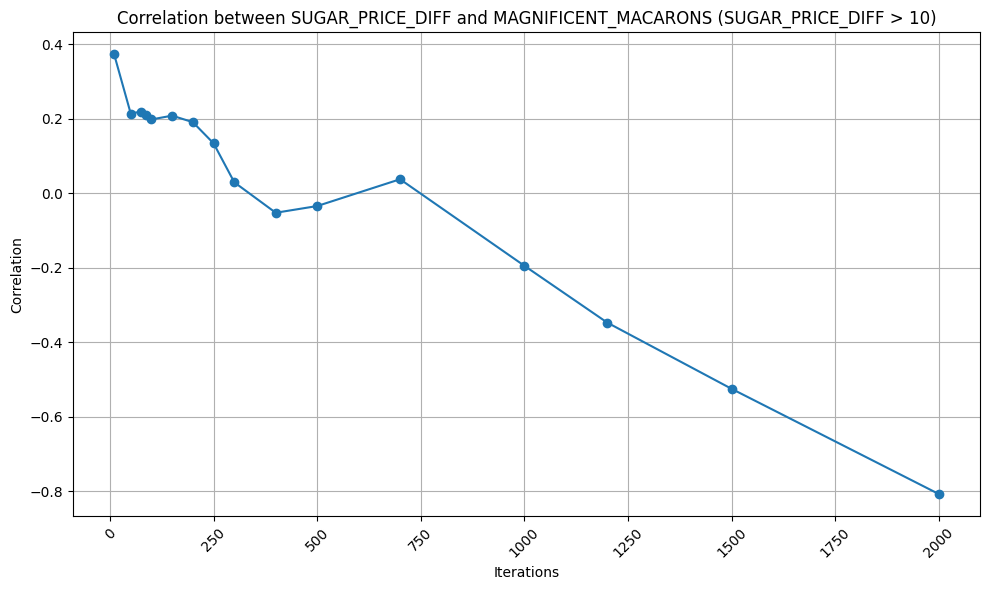

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)  # Use the same iteration for both HUMIDITY_DIFF and ORCHIDS

    return new_df

def calculate_correlation(df, iteration):
    columns_to_process = ['SUGAR_PRICE_DIFF']
    correlations = {}

    for col in columns_to_process:
        corr = df[f"{col}_returns_from_{iteration}_its_ago"].corr(df[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its"], method='pearson')
        correlations[col] = corr

    return correlations

# Assuming you have your original DataFrame named 'df'
iteration_candidates = [10, 50, 75, 87, 100, 150, 200, 250, 300, 400, 500, 700, 1000, 1200, 1500, 2000]
correlation_data = {}

for iteration in iteration_candidates:
    print(f"Iteration: {iteration}")
    new_df = generate_returns_dataframe(df, iteration)
    new_df = new_df[new_df['SUGAR_PRICE_DIFF'] > 10]  # Restrict to only when HUMIDITY_DIFF > 10
    correlations = calculate_correlation(new_df, iteration)
    correlation_data[iteration] = correlations

    # Print the correlation values
    for col, corr in correlations.items():
        print(f"Correlation between {col}_returns_from_{iteration}_its_ago and MAGNIFICENT_MACARONS_returns_in_{iteration}_its: {corr}")

# Create a line plot of the correlations
plt.figure(figsize=(10, 6))
plt.plot(iteration_candidates, [correlation_data[i]['SUGAR_PRICE_DIFF'] for i in iteration_candidates], marker='o')
plt.xlabel('Iterations')
plt.ylabel('Correlation')
plt.title("Correlation between SUGAR_PRICE_DIFF and MAGNIFICENT_MACARONS (SUGAR_PRICE_DIFF > 10)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

# Assuming you have your original DataFrame named 'df'
iteration = 100

# Generate the returns DataFrame
new_df = generate_returns_dataframe(df, iteration).dropna()

# Restrict the DataFrame to HUMIDITY_DIFF >= 10
new_df = new_df[new_df['SUGAR_PRICE_DIFF'] >= 10]

# Prepare the input features (X) and target variable (y) for linear regression
X = new_df[f"SUGAR_PRICE_DIFF_returns_from_{iteration}_its_ago"].values.reshape(-1, 1)
y = new_df[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its"].values.reshape(-1, 1)

# Create a linear regression model with no constant term
model = LinearRegression(fit_intercept=False)

# Fit the model
model.fit(X, y)

# Print the coefficient (slope) of the linear regression
coefficient = model.coef_[0][0]
print(f"Coefficient (Slope) of Linear Regression: {coefficient}")

Coefficient (Slope) of Linear Regression: 0.5264211492519978


In [91]:
new_df

,timestamp,MAGNIFICENT_MACARONS,TRANSPORT_FEES,EXPORT_TARIFFS,IMPORT_TARIFF,SUGAR_PRICE,SUNLIGHT_INDEX,SUGAR_PRICE_DIFF,MAGNIFICENT_MACARONS_returns_from_100_its_ago,MAGNIFICENT_MACARONS_returns_in_100_its,SUGAR_PRICE_DIFF_returns_from_100_its_ago,SUGAR_PRICE_DIFF_returns_in_100_its
100,10000,644.791942,1.0,9.5,-3.0,200.516291,60.25,130.516291,0.027148,-0.042329,0.003971,-0.004077
101,10100,643.935267,1.0,9.5,-3.0,200.269819,60.25,130.269819,0.023275,-0.040958,0.001317,-0.000601
102,10200,643.046492,1.0,9.5,-3.0,200.114806,60.26,130.114806,0.021032,-0.039462,0.000084,0.002030
103,10300,642.127235,1.0,9.5,-3.0,200.124544,60.26,130.124544,0.018287,-0.037886,-0.001748,0.002450
104,10400,641.480410,1.0,9.5,-3.0,200.264367,60.26,130.264367,0.017028,-0.036842,0.000483,0.000353
...,...,...,...,...,...,...,...,...,...,...,...,...
9895,989500,702.074373,1.4,10.5,-4.0,212.752923,62.94,142.752923,0.010851,-0.044961,-0.000474,-0.019801
9896,989600,701.783154,1.4,10.5,-4.0,212.712140,62.96,142.712140,0.010817,-0.045296,-0.001098,-0.022052
9897,989700,701.531497,1.4,10.5,-4.0,212.619520,62.98,142.619520,0.010929,-0.045719,-0.000771,-0.021839
9898,989800,701.542422,1.4,10.5,-4.0,212.633446,63.00,142.633446,0.011615,-0.046497,0.000040,-0.022088


In [97]:

df_day_2 = pd.read_csv(f"./observations_round_4_day_{2}.csv", sep=",", header=0)
df_day_3 = pd.read_csv(f"./observations_round_4_day_{3}.csv", sep=",", header=0)

In [98]:
df_day_2 = df_day_2[['timestamp', 'MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF','SUNLIGHT_INDEX', 'SUGAR_PRICE']]
df_day_2.loc[:, 'MAGNIFICENT_MACARONS'] = df_day_2['MAGNIFICENT_MACARONS'].ewm(alpha = 0.05).mean().reset_index(drop=True)
df_day_2['SUGAR_PRICE_DIFF'] = np.abs(df_day_2["SUGAR_PRICE"] - 70)

In [99]:
df_day_3 = df_day_3[['timestamp', 'MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF','SUNLIGHT_INDEX', 'SUGAR_PRICE']]
df_day_3.loc[:, 'MAGNIFICENT_MACARONS'] = df_day_3['MAGNIFICENT_MACARONS'].ewm(alpha = 0.05).mean().reset_index(drop=True)
df_day_3['SUGAR_PRICE_DIFF'] = np.abs(df_day_3["SUGAR_PRICE"] - 70)

In [100]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

# Assuming you have your dataframes named 'df_day_2' and 'df_day_3'
iteration = 100

# Generate the returns DataFrame for df_day_1
df_day_2_returns = generate_returns_dataframe(df_day_2, iteration).dropna()
df_day_2_returns = df_day_2_returns[df_day_2_returns['SUGAR_PRICE_DIFF'] >= 15]

# Generate the returns DataFrame for df_day_2
df_day_3_returns = generate_returns_dataframe(df_day_3, iteration).dropna()
df_day_3_returns = df_day_3_returns[df_day_3_returns['SUGAR_PRICE_DIFF'] >= 15]

# Concatenate the two DataFrames vertically
combined_df = pd.concat([df_day_2_returns, df_day_3_returns], ignore_index=True)

# Prepare the input features (X) and target variable (y) for linear regression
X = combined_df[f"SUGAR_PRICE_DIFF_returns_from_{iteration}_its_ago"].values.reshape(-1, 1)
y = combined_df[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its"].values.reshape(-1, 1)

# Create a linear regression model with no constant term
model = LinearRegression(fit_intercept=False)

# Fit the model
model.fit(X, y)

# Get the coefficient (slope) of the linear regression
coefficient = model.coef_[0][0]

# Generate the equation
equation = f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its = {coefficient:.4f} * SUGAR_PRICE_DIFF_returns_from_{iteration}_its_ago"
print("Equation:")
print(equation)

# Make predictions using the fitted model
y_pred = model.predict(X)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# Calculate R-squared value
r2 = r2_score(y, y_pred)
print(f"R-squared (R^2) Value: {r2:.4f}")

Equation:
MAGNIFICENT_MACARONS_returns_in_100_its = 0.1858 * SUGAR_PRICE_DIFF_returns_from_100_its_ago

Mean Squared Error (MSE): 0.0012
R-squared (R^2) Value: 0.0017


In [104]:
df_day_1 = pd.read_csv(f"./observations_round_4_day_{1}.csv", sep=",", header=0)

In [105]:
df_day_1 = df_day_1[['timestamp', 'MAGNIFICENT_MACARONS', 'TRANSPORT_FEES', 'EXPORT_TARIFFS', 'IMPORT_TARIFF','SUNLIGHT_INDEX', 'SUGAR_PRICE']]
df_day_1.loc[:, 'MAGNIFICENT_MACARONS'] = df_day_1['MAGNIFICENT_MACARONS'].ewm(alpha = 0.05).mean().reset_index(drop=True)
df_day_1['SUGAR_PRICE_DIFF'] = np.abs(df_day_1["SUGAR_PRICE"] - 70)

In [106]:
import pandas as pd
from sklearn.metrics import r2_score

def generate_returns_dataframe(df, iteration):
    columns_to_process = ['MAGNIFICENT_MACARONS', 'SUGAR_PRICE_DIFF']
    new_df = df.copy()

    for col in columns_to_process:
        new_df = get_prev_returns(new_df, col, iteration)
        new_df = get_future_returns(new_df, col, iteration)

    return new_df

# Assuming you have your dataframe named 'df_day_neg_1'
iteration = 100

# Generate the returns DataFrame for df_day_neg_1
df_day_1_returns = generate_returns_dataframe(df_day_1, iteration).dropna()
df_day_1_returns = df_day_1_returns[df_day_1_returns['SUGAR_PRICE_DIFF'] >= 15]

# Prepare the input features (X) for prediction
X = df_day_1_returns[f"SUGAR_PRICE_DIFF_returns_from_{iteration}_its_ago"].values.reshape(-1, 1)

# Use the learned coefficient to make predictions
coefficient = 0.0471  # Replace with the coefficient from your learned equation
y_pred = coefficient * X

# Add the predicted values as a new column in the DataFrame
df_day_1_returns[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its_predicted"] = y_pred

# Get the actual ORCHIDS future returns
y_true = df_day_1_returns[f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its"].values.reshape(-1, 1)

# Calculate the test R-squared value
test_r2 = r2_score(y_true, y_pred)

# Print the test R-squared value
print(f"Test R-squared (R^2) Value: {test_r2:.4f}")

# Print the DataFrame with the predicted values
print("\nDataFrame with Predicted Values:")
print(df_day_1_returns[[f"SUGAR_PRICE_DIFF_returns_from_{iteration}_its_ago", f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its", f"MAGNIFICENT_MACARONS_returns_in_{iteration}_its_predicted"]])

Test R-squared (R^2) Value: 0.0054

DataFrame with Predicted Values:
      SUGAR_PRICE_DIFF_returns_from_100_its_ago  \
100                                    0.003971   
101                                    0.001317   
102                                    0.000084   
103                                   -0.001748   
104                                    0.000483   
...                                         ...   
9895                                  -0.000474   
9896                                  -0.001098   
9897                                  -0.000771   
9898                                   0.000040   
9899                                  -0.004064   

      MAGNIFICENT_MACARONS_returns_in_100_its  \
100                                 -0.042329   
101                                 -0.040958   
102                                 -0.039462   
103                                 -0.037886   
104                                 -0.036842   
...                     

In [107]:
df_day_2_returns = generate_returns_dataframe(df_day_2, iteration).dropna()

In [108]:
df_test = df_day_2_returns[(df_day_2_returns['timestamp'] > 127600) & (df_day_2_returns['timestamp'] < 161100)]

In [109]:
df_test['MAGNIFICENT_MACARONS_returns_in_100_its'].max()

np.float64(0.01939005732073047)

In [111]:
day = 1
df = pd.read_csv(f"./observations_round_4_day_{day}.csv", sep=",", header=0)

In [112]:
df['arb_spread'] = df['IMPORT_TARIFF'] + df['TRANSPORT_FEES']

In [113]:
df['arb_spread'].mean()

np.float64(-2.2122699999999997)

In [114]:
day_1_mean = _

In [115]:
df['arb_spread'].max()

np.float64(-1.7)

In [116]:
df['arb_spread'].min()

np.float64(-2.8)

In [117]:
day = 2
df = pd.read_csv(f"./observations_round_4_day_{day}.csv", sep=",", header=0)

In [118]:
df['arb_spread'] = df['IMPORT_TARIFF'] + df['TRANSPORT_FEES']

In [119]:
df['arb_spread'].mean()

np.float64(-0.9835799999999998)

In [120]:
day_2_mean = _

In [121]:
df['arb_spread'].max()

np.float64(-0.10000000000000009)

In [122]:
df['arb_spread'].min()

np.float64(-2.6)

In [123]:
day = 3
df = pd.read_csv(f"./observations_round_4_day_{day}.csv", sep=",", header=0)

In [124]:
df['arb_spread'] = df['IMPORT_TARIFF'] + df['TRANSPORT_FEES']

In [125]:
df['arb_spread'].mean()

np.float64(-3.1047399999999996)

In [126]:
day_3_mean = _

In [127]:
df['arb_spread'].max()

np.float64(-0.8999999999999999)

In [128]:
df['arb_spread'].min()

np.float64(-4.5)

In [129]:
day_1_mean + day_2_mean + day_3_mean

np.float64(-6.30059)

In [130]:
_/3

np.float64(-2.1001966666666667)